## Import libraries<a id='content'></a>

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # For specifying the axes tick format 
sns.set(style = 'white')
from sklearn.preprocessing import OrdinalEncoder

#from geopy.geocoders import Nominatim
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import preprocessing
#from sklearn.preprocessing.LabelEncoder

import numpy as np
#%matplotlib inline

## Loading Data<a id='load'></a>([go to contents](#content))

In [76]:
df = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [77]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [79]:
for col in df.columns:
    display(df[str(col)].value_counts(normalize=True)*100)

5201-CBWYG    0.014198
0238-WHBIQ    0.014198
2229-VWQJH    0.014198
4853-RULSV    0.014198
1548-FEHVL    0.014198
                ...   
9919-FZDED    0.014198
8028-PNXHQ    0.014198
1444-VVSGW    0.014198
4423-YLHDV    0.014198
9548-LIGTA    0.014198
Name: customerID, Length: 7043, dtype: float64

Male      50.47565
Female    49.52435
Name: gender, dtype: float64

0    83.785319
1    16.214681
Name: SeniorCitizen, dtype: float64

No     51.69672
Yes    48.30328
Name: Partner, dtype: float64

No     70.041176
Yes    29.958824
Name: Dependents, dtype: float64

1     8.703677
72    5.139855
2     3.379242
3     2.839699
4     2.498935
        ...   
28    0.809314
39    0.795116
44    0.724123
36    0.709925
0     0.156183
Name: tenure, Length: 73, dtype: float64

Yes    90.316626
No      9.683374
Name: PhoneService, dtype: float64

No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: MultipleLines, dtype: float64

Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: InternetService, dtype: float64

No                     49.666335
Yes                    28.666761
No internet service    21.666903
Name: OnlineSecurity, dtype: float64

No                     43.844952
Yes                    34.488144
No internet service    21.666903
Name: OnlineBackup, dtype: float64

No                     43.944342
Yes                    34.388755
No internet service    21.666903
Name: DeviceProtection, dtype: float64

No                     49.311373
Yes                    29.021724
No internet service    21.666903
Name: TechSupport, dtype: float64

No                     39.897771
Yes                    38.435326
No internet service    21.666903
Name: StreamingTV, dtype: float64

No                     39.542808
Yes                    38.790288
No internet service    21.666903
Name: StreamingMovies, dtype: float64

Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: Contract, dtype: float64

Yes    59.221922
No     40.778078
Name: PaperlessBilling, dtype: float64

Electronic check             33.579441
Mailed check                 22.887974
Bank transfer (automatic)    21.922476
Credit card (automatic)      21.610109
Name: PaymentMethod, dtype: float64

20.05     0.866108
19.85     0.638932
19.90     0.624734
19.95     0.624734
19.65     0.610535
            ...   
87.65     0.014198
35.30     0.014198
114.85    0.014198
56.50     0.014198
97.25     0.014198
Name: MonthlyCharges, Length: 1585, dtype: float64

20.2       0.156183
           0.156183
19.75      0.127786
19.65      0.113588
19.9       0.113588
             ...   
613.95     0.014198
2338.35    0.014198
49.5       0.014198
68.8       0.014198
3229.65    0.014198
Name: TotalCharges, Length: 6531, dtype: float64

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

## Handling missing values<a id='Handling_missing_values'></a>([go to contents](#content))

In [80]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### We can hadle missing values based on the case of it using many methods as:
* Droping records with missing values
* Imputing using mean or median or mode
* Fill with any value you feel logical
* Imputing Missing Class Labels Using k-Nearest Neighbors

As shown above the number of samples that has missing data are **only 11 of 7043** so it's better to handle this by **droping** the records having missing values as follows:

In [81]:
df.dropna(inplace = True)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Now we beleieves that the data doesn't have any missing value so will go through the next stage:

## Dropping duplicates <a id='Drop'></a>([go to contents](#content))

No duplicates

In [83]:
df.duplicated().count()

7043

## Catecorical Data Encoding and Data imbalancing correction<a id='Catecorical_Data_Encoding '></a>([go to contents](#content))

First as we can see above most of the categorical data has values of 'Yes' , 'No' not 1 ,0 so we will convert the churn column as it's the target first

**Asmaa Starts Here**

In [84]:
#TotalCharges can be driven from MonthlyCharges Two options (drop or (leave and scale)) 
#df["TotalCharges"] = pd.to_numeric(df.TotalCharges, errors='coerce')
#df['TotalCharges'] = df['TotalCharges'].map(np.log1p)
df.drop(['TotalCharges','customerID'],inplace = True,axis = 1)
#df['tenure'] = df['tenure'].map(np.log1p)
#df['MonthlyCharges'] = df['MonthlyCharges'].map(np.log1p)
#convert categorical to numerical
ord_enc = OrdinalEncoder()
df["Contract"] = ord_enc.fit_transform(df[["Contract"]])

df['PaymentMethod'] = ord_enc.fit_transform(df[['PaymentMethod']])

df["Churn"] = ord_enc.fit_transform(df[["Churn"]])
#df.drop(['PaymentMethod'],inplace = True,axis = 1)

#data with values (Yes or NO) -> get_dummies
df = pd.get_dummies(df, columns = ['gender', 'Partner', 'Dependents','PhoneService',
                                       'MultipleLines','InternetService','OnlineSecurity',
                                       'OnlineBackup','DeviceProtection','TechSupport',
                                       'StreamingTV','StreamingMovies','PaperlessBilling'
                                       ], drop_first = False)

df.drop(['gender_Female','Partner_No','Dependents_No','PhoneService_No','MultipleLines_No phone service','OnlineSecurity_No internet service',
                 'OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service',
                 'StreamingMovies_No internet service','PaperlessBilling_No','StreamingTV_No internet service'],inplace = True,axis = 1)
                 


In [85]:
df.columns

Index(['SeniorCitizen', 'tenure', 'Contract', 'PaymentMethod',
       'MonthlyCharges', 'Churn', 'gender_Male', 'Partner_Yes',
       'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes'],
      dtype='object')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SeniorCitizen                7043 non-null   int64  
 1   tenure                       7043 non-null   int64  
 2   Contract                     7043 non-null   float64
 3   PaymentMethod                7043 non-null   float64
 4   MonthlyCharges               7043 non-null   float64
 5   Churn                        7043 non-null   float64
 6   gender_Male                  7043 non-null   uint8  
 7   Partner_Yes                  7043 non-null   uint8  
 8   Dependents_Yes               7043 non-null   uint8  
 9   PhoneService_Yes             7043 non-null   uint8  
 10  MultipleLines_No             7043 non-null   uint8  
 11  MultipleLines_Yes            7043 non-null   uint8  
 12  InternetService_DSL          7043 non-null   uint8  
 13  InternetService_Fi

## Handling Outliers <a id='Handling_Outliers'></a>

[go to contents](#content)   


In [87]:
df.describe()

,SeniorCitizen,tenure,Contract,PaymentMethod,MonthlyCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_Yes
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,0.690473,1.574329,64.761692,0.265370,0.504756,0.483033,0.299588,0.903166,...,0.344881,0.439443,0.343888,0.493114,0.290217,0.398978,0.384353,0.395428,0.387903,0.592219
std,0.368612,24.559481,0.833755,1.068104,30.090047,0.441561,0.500013,0.499748,0.458110,0.295752,...,0.475363,0.496355,0.475038,0.499988,0.453895,0.489723,0.486477,0.488977,0.487307,0.491457
min,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,0.000000,1.000000,35.500000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,0.000000,2.000000,70.350000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,55.000000,1.000000,2.000000,89.850000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,72.000000,2.000000,3.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data visualization  <a id='data_visualization'></a>([go to contents](#content))

<AxesSubplot:>

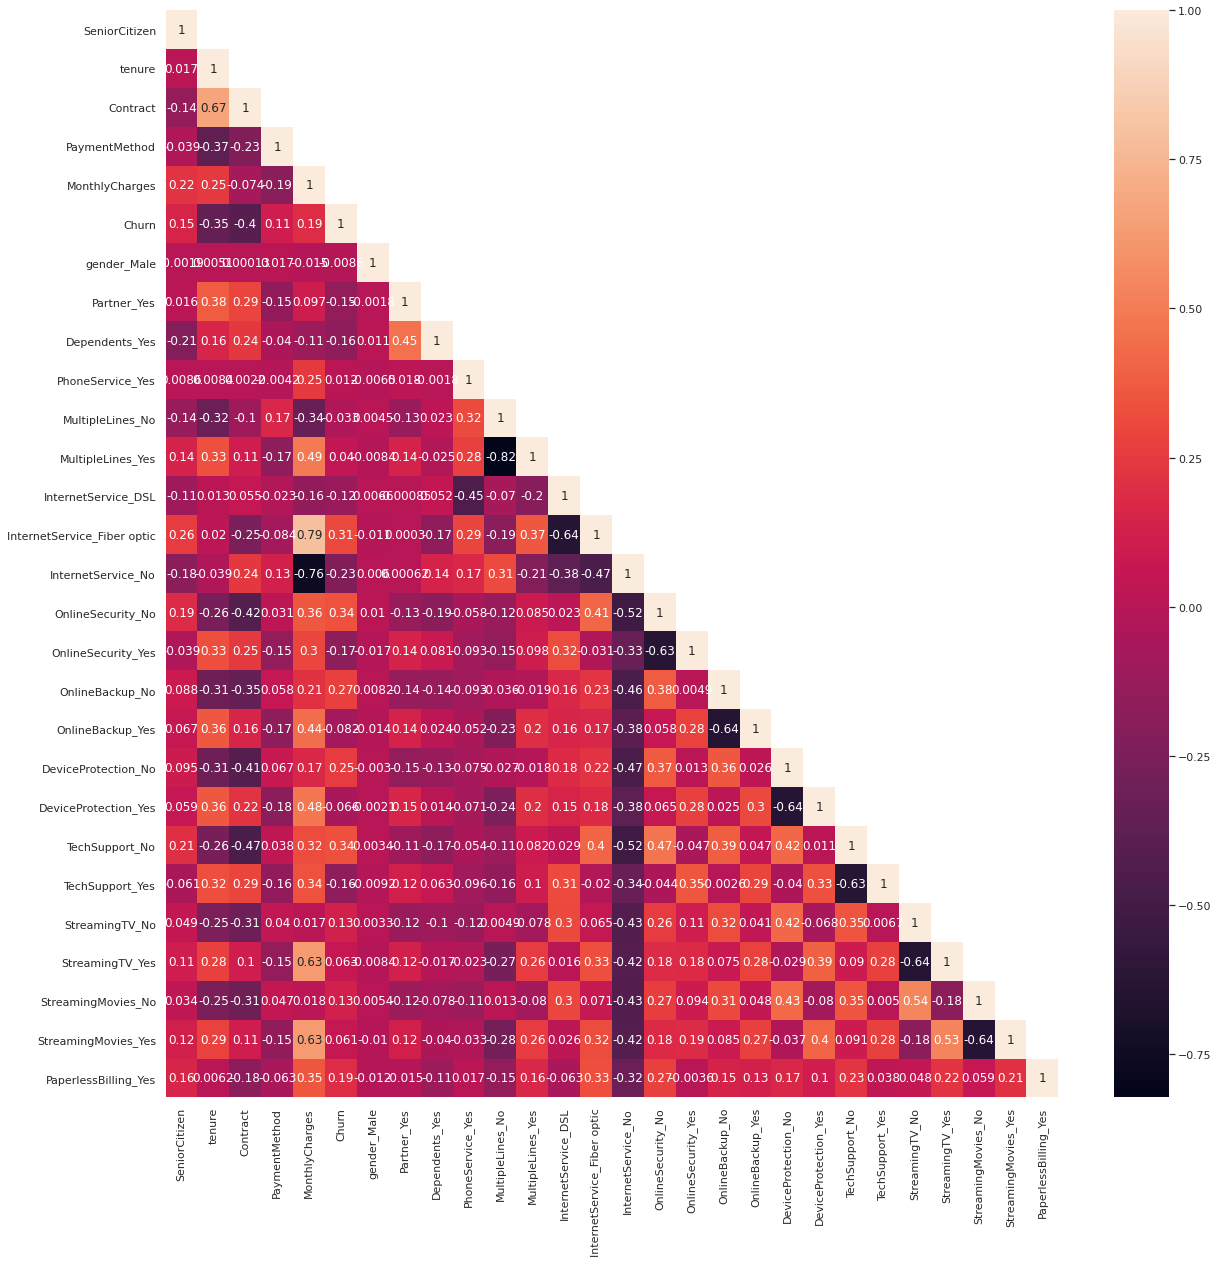

In [88]:
fig, ax = plt.subplots(figsize=(20,20))
cormat= df.corr()
mask = np.array(cormat)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(cormat,mask=mask,annot = True)

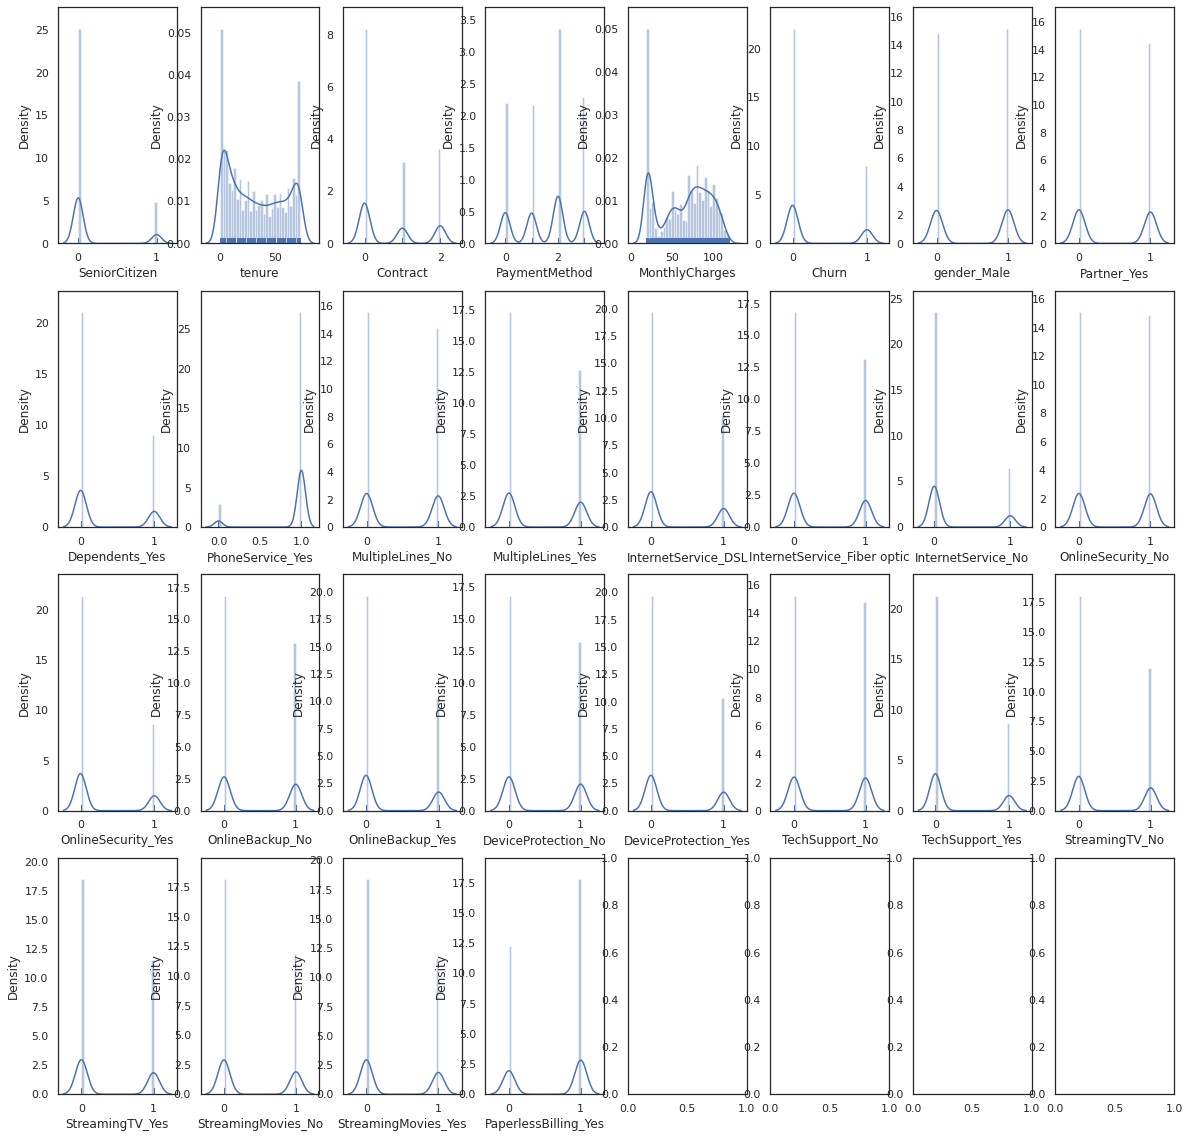

In [89]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

r = 4
c = 8
fig, axs = plt.subplots(r, c, figsize=(20, 20))

i = 0
j = 0
for column in df.columns:
    sns.distplot(df[column], rug=True, bins=30, kde=True, hist=True, color='b', ax=axs[i, j])
    if(j == c-1):
        j = 0
        i += 1
    else:
        j += 1

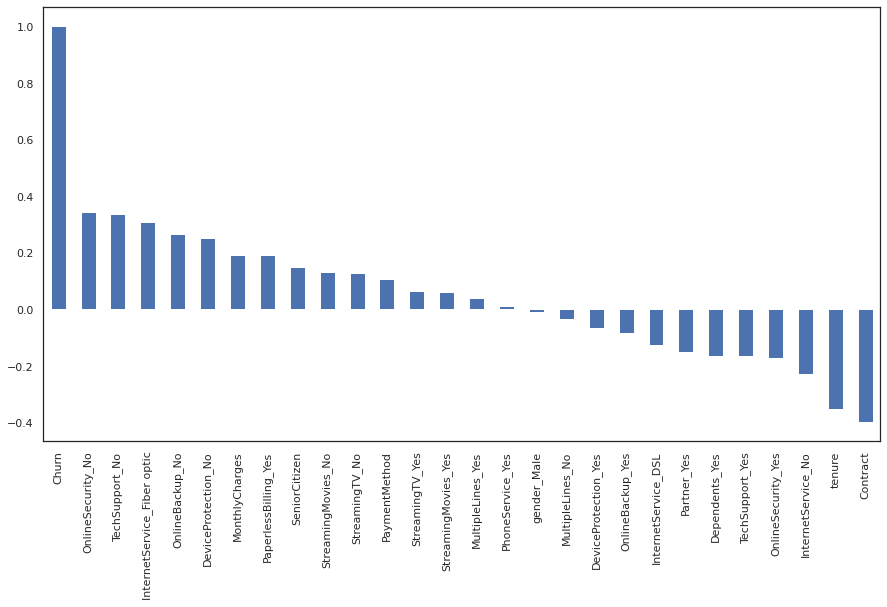

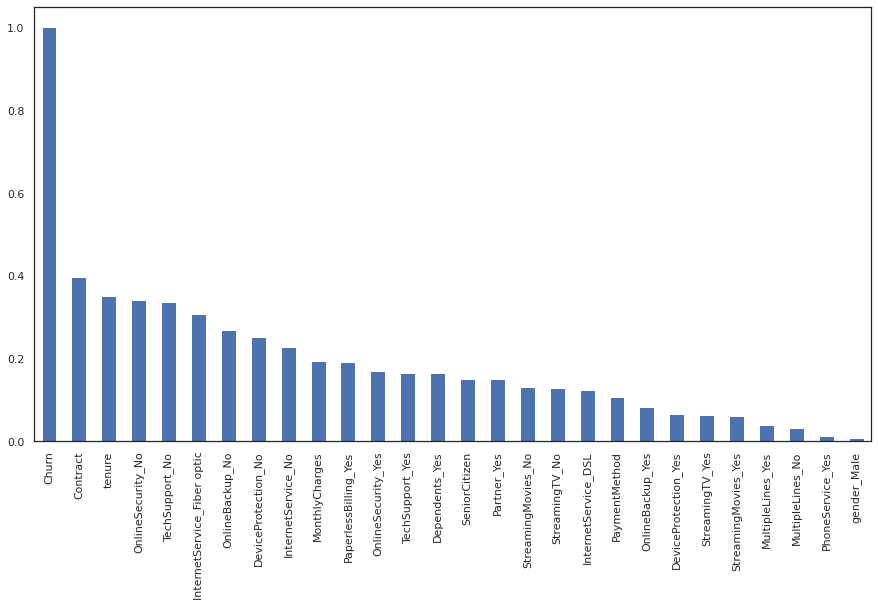

In [90]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')
plt.show()

#Get the absolute of the Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
abs(df.corr()['Churn']).sort_values(ascending = False).plot(kind='bar')
plt.show()

## Split data and train the model  <a id='Splitting_data'></a>([go to contents](#content))

In [91]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42) 

x_train = train_set.drop(columns=['Churn'])
y_train = train_set['Churn']

x_test = test_set.drop(columns=['Churn'])
y_test= test_set['Churn']


# RandomForest

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
'''
param = {
    'bootstrap': [True],
    'max_depth': [80, 100,200],
    'max_features': [2],
    'min_samples_leaf': [4, 5],
    'min_samples_split': [ 12,20],
    'n_estimators': [200, 300]
}
'''
# Create a based model
rf = RandomForestClassifier(
 bootstrap=True,
 max_depth=200,
 max_features= 7,
 min_samples_leaf= 4,
 min_samples_split=15,
 n_estimators= 300)
# Instantiate the grid search model
#grid_search = GridSearchCV(estimator = rf, param_grid = param, cv = 5, verbose = True)
#grid_search.fit(x_train,y_train)

rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=200, max_features=7, min_samples_leaf=4,
                       min_samples_split=15, n_estimators=300)

In [93]:
#grid_search.best_params_

In [94]:
#best_grid = grid_search.best_estimator_
yhat = rf.predict(x_test)
print("accuracy: " ,rf.score(x_test,y_test) )

accuracy:  0.808374733853797


# Compare between other classifiers

In [95]:
# Import required libraries for performance metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

# Define dictionary with performance metrics
scoring = {'accuracy':make_scorer(accuracy_score), 
           'precision':make_scorer(precision_score),
           'recall':make_scorer(recall_score), 
           'f1_score':make_scorer(f1_score)}

# Import required libraries for machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Instantiate the machine learning classifiers
log_model = LogisticRegression(max_iter=10000)
svc_model = LinearSVC(dual=False)
dtr_model = DecisionTreeClassifier()
rfc_model = RandomForestClassifier(bootstrap=True,
 max_depth=200,
 max_features= 7,
 min_samples_leaf= 4,
 min_samples_split=15,
 n_estimators= 300)
gnb_model = GaussianNB()

# Define the models evaluation function
def models_evaluation(X, y, folds):
    
    '''
    X : data set features
    y : data set target
    folds : number of cross-validation folds
    
    '''
    
    # Perform cross-validation to each machine learning classifier
    log = cross_validate(log_model, X, y, cv=folds, scoring=scoring)
    svc = cross_validate(svc_model, X, y, cv=folds, scoring=scoring)
    dtr = cross_validate(dtr_model, X, y, cv=folds, scoring=scoring)
    rfc = cross_validate(rfc_model, X, y, cv=folds, scoring=scoring)
    gnb = cross_validate(gnb_model, X, y, cv=folds, scoring=scoring)

    # Create a data frame with the models perfoamnce metrics scores
    models_scores_table = pd.DataFrame({'Logistic Regression':[log['test_accuracy'].mean(),
                                                               log['test_precision'].mean(),
                                                               log['test_recall'].mean(),
                                                               log['test_f1_score'].mean()],
                                       
                                      'Support Vector Classifier':[svc['test_accuracy'].mean(),
                                                                   svc['test_precision'].mean(),
                                                                   svc['test_recall'].mean(),
                                                                   svc['test_f1_score'].mean()],
                                       
                                      'Decision Tree':[dtr['test_accuracy'].mean(),
                                                       dtr['test_precision'].mean(),
                                                       dtr['test_recall'].mean(),
                                                       dtr['test_f1_score'].mean()],
                                       
                                      'Random Forest':[rfc['test_accuracy'].mean(),
                                                       rfc['test_precision'].mean(),
                                                       rfc['test_recall'].mean(),
                                                       rfc['test_f1_score'].mean()],
                                       
                                      'Gaussian Naive Bayes':[gnb['test_accuracy'].mean(),
                                                              gnb['test_precision'].mean(),
                                                              gnb['test_recall'].mean(),
                                                              gnb['test_f1_score'].mean()]},
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
    
    # Add 'Best Score' column
    models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
    
    # Return models performance metrics scores data frame
    return(models_scores_table)
  
# Run models_evaluation function
models_evaluation(x_train, y_train, 20)

,Logistic Regression,Support Vector Classifier,Decision Tree,Random Forest,Gaussian Naive Bayes,Best Score
Accuracy,0.800139,0.800319,0.726664,0.796224,0.737125,Support Vector Classifier
Precision,0.651118,0.655956,0.488174,0.657586,0.503734,Random Forest
Recall,0.536054,0.523369,0.503351,0.487856,0.755928,Gaussian Naive Bayes
F1 Score,0.587108,0.581522,0.494474,0.559339,0.604080,Gaussian Naive Bayes


# Logistic Regression

In [96]:
log_model = LogisticRegression(max_iter=500)
log_model.fit(x_train,y_train)
print("accuracy: " ,log_model.score(x_test,y_test) )

accuracy:  0.8183108587650816


# DecisionTreeClassifier

In [97]:
DT = DecisionTreeClassifier(max_depth=90,max_leaf_nodes = 50,max_features=10)
DT.fit(x_train,y_train)
print("accuracy: " ,DT.score(x_test,y_test) )

accuracy:  0.7977288857345636


# AdaBoostClassifier

In [98]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=300, random_state=0,learning_rate =0.5)
ada.fit(x_train, y_train)

#print(ada.predict(x_test))
print("accuracy: " ,ada.score(x_test,y_test))

accuracy:  0.8105039034776437


# GradientBoostingClassifier

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=300, random_state=0,learning_rate =0.01,max_depth=4)
gb.fit(x_train, y_train)

#print(ada.predict(x_test))
print("accuracy: " ,gb.score(x_test,y_test))

accuracy:  0.8112136266855926


# XGBoost

In [100]:
from xgboost.sklearn import XGBClassifier
xb = XGBClassifier(n_estimators=1000, random_state=0,learning_rate =0.01,max_depth=4)
xb.fit(x_train, y_train)

#print(ada.predict(x_test))
print("accuracy: " ,xb.score(x_test,y_test))

[15:16:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy:  0.8076650106458482


# LGBMClassifier

In [101]:
from lightgbm import LGBMClassifier
hyperparameters = { 'colsample_bytree': 0.6,  'learning_rate': 0.001,
                    'num_leaves': 50, 'n_estimators': 1200}
model = LGBMClassifier(**hyperparameters)
model.fit(x_train, y_train)
print("accuracy: " ,model.score(x_test,y_test))

accuracy:  0.801277501774308
